In [1]:
library(R.matlab)
library(ggplot2)
library(fda)
library(caTools)
library(repr)
library(MASS)

R.matlab v3.6.1 (2016-10-19) successfully loaded. See ?R.matlab for help.

Attaching package: ‘R.matlab’

The following objects are masked from ‘package:base’:

    getOption, isOpen

Loading required package: splines
Loading required package: Matrix

Attaching package: ‘fda’

The following object is masked from ‘package:graphics’:

    matplot



In [2]:
# Change plot size to 5 x 4
options(repr.plot.width=5, repr.plot.height=4)

In [3]:
# Read pre_pmcao factors for GDPCA
GDPC <- as.matrix(read.table("data/gdpca_pre_factors.rmat", as.is = TRUE))
colnames(GDPC) <- NULL
GDPC <- unname(GDPC)

# Read pre_pmcao factors for SPCA
SPCA = as.matrix(read.csv("data/factor1_pre_normalized_removed.csv"))[, 2:1001]

# Take transpose of SPCA for functional boxplots
SPCA = t(SPCA)

In [4]:
sprintf("Dims of GDPC: %s\n", dim(GDPC))
sprintf("Dims of SPCA: %s\n", dim(SPCA))

[1] "Dims of GDPC: 1000\n" "Dims of GDPC: 300\n"

[1] "Dims of SPCA: 1000\n" "Dims of SPCA: 300\n"

In [110]:
# Collect log periodograms of factors for each epoch
log_periodograms <- function(factors, num_epochs, smooth=TRUE, window=11, tlim=500) {
    
    # Smooth the log periodograms
    smoothing <- function(log_pds, w=window) {
        sm_log_pd_list = list()
        for(i in 1:num_epochs) {
            sm_log_pd = stats::filter(log_pds[[i]], rep(1/w, w), circular=TRUE)
            sm_log_pd_list[[i]] = sm_log_pd
        }
        res <- do.call(cbind, sm_log_pd_list)
        return (res)
    }
    
    logpd.list = c()
    for (i in 1:num_epochs) {
        factor_epoch = factors[, i]
        periodogram = (abs(fft(factor_epoch)))^2
        log_pd = log(periodogram[1:tlim])
        logpd.list[[i]] = log_pd
    }
    if (smooth) {
        res <- smoothing(logpd.list)
    }
    else {
        res <- do.call(cbind, logpd.list)
    }
    return (res)
}

In [6]:
# Get log periodograms for SPCA and GDPC
Xspd = log_periodograms(SPCA, num_epochs=300)
Xgpd = log_periodograms(GDPC, num_epochs=300, smooth=FALSE)

# Plot factors for GPCA vs SPCA

In [109]:
plot_factors <- function(GDPC, SPCA, epoch) {
    par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)
    plot(GDPC[, epoch], xaxt="n", yaxt="n", type='l', ylab='',
         main=sprintf("Epoch %s: First Factors", epoch),xlab='ms', bty="n", col="darkblue")
    lines(SPCA[, epoch], col=2, xpd=FALSE)
    axis(side=1, at=seq(0, 1000, 1000))
    legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
           lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.17, 0))
}

plot_periodograms <-function(Xgpd, Xspd, epoch) {
    par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)
    plot(Xspd[1:500, epoch], xaxt="n", yaxt="n", type='l', ylab='', xlab='Hz',
         main=sprintf("Epoch %s: Log Periodograms", epoch), bty='n', col='red')
    lines(Xgpd[1:500, epoch], col="darkblue", xpd=FALSE)
    axis(side=1, at=seq(0, 500, 500))
    legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
           lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.17, 0))
}

# Pre Epoch 1

In [94]:
png(filename = "figures/pre_factors_log/pre_factor_epoch1.png")
plot_factors(GDPC, SPCA, 1)
dev.off()

png 
  2

In [95]:
png(filename = "figures/pre_factors_log/pre_log_epoch1.png")
plot_periodograms(GDPC, SPCA, 1)
dev.off()

png 
  2

# Pre Epoch 45

In [116]:
epochs = c(1, 45, 187, 212, 285, 296)
for(i in epochs){
    png(filename = sprintf("figures/pre_factors_log/pre_factor_epoch%s.png", i))
    plot_factors(GDPC, SPCA, i)
    dev.off()
    
    png(filename = sprintf("figures/pre_factors_log/pre_log_epoch%s.png", i))
    plot_periodograms(Xgpd, Xspd, i)
    dev.off()
}

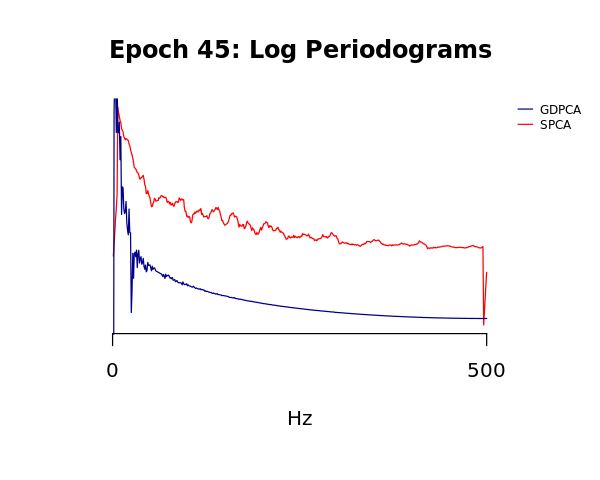

In [113]:
plot_periodograms(Xgpd, Xspd, 45)

# Pre Epoch 187

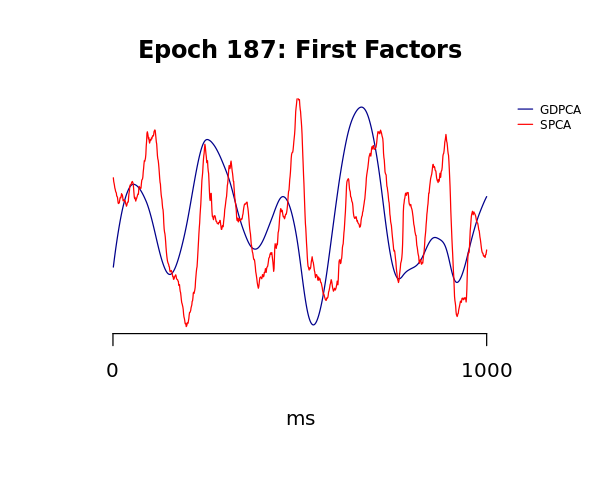

In [12]:
plot_factors(GDPC, SPCA, 187)

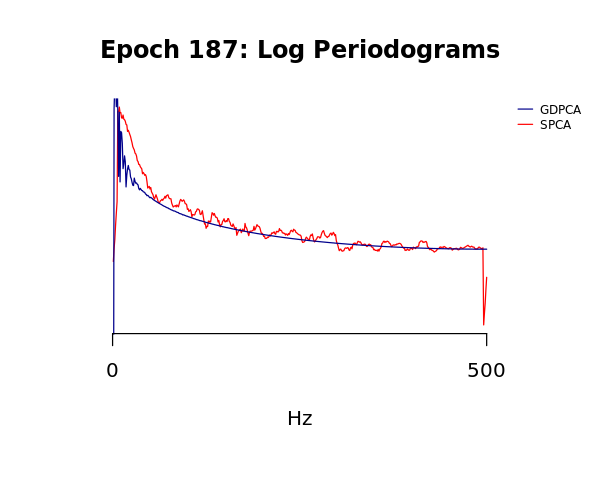

In [114]:
plot_periodograms(Xgpd, Xspd, 187)

# Pre Epoch 212

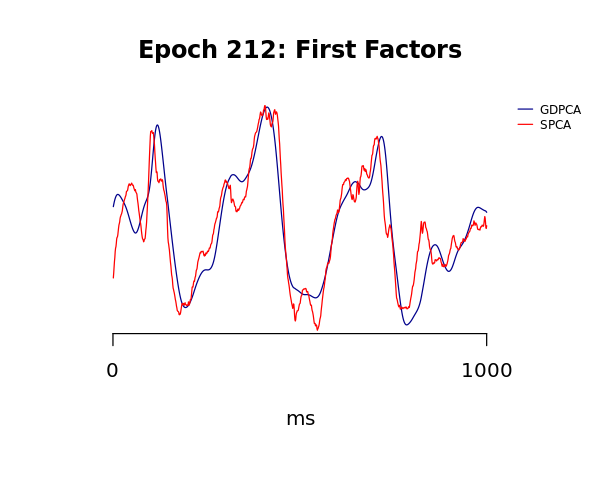

In [14]:
plot_factors(GDPC, SPCA, 212)

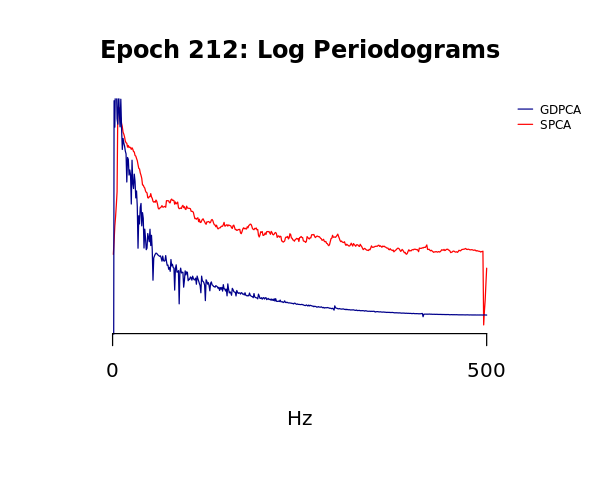

In [115]:
plot_periodograms(Xgpd, Xspd, 212)

# Pre Epoch 285

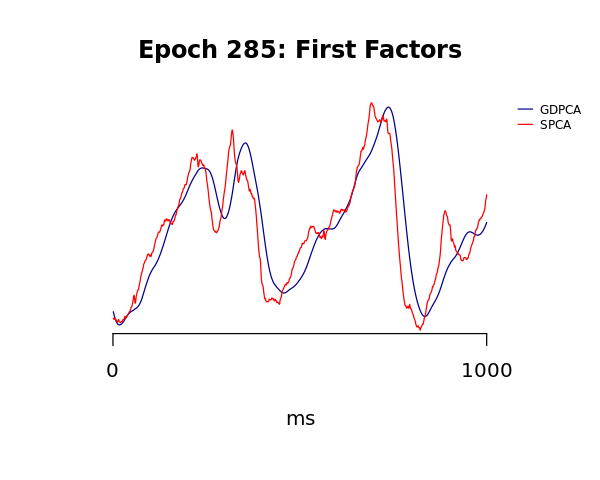

In [16]:
plot_factors(GDPC, SPCA, 285)

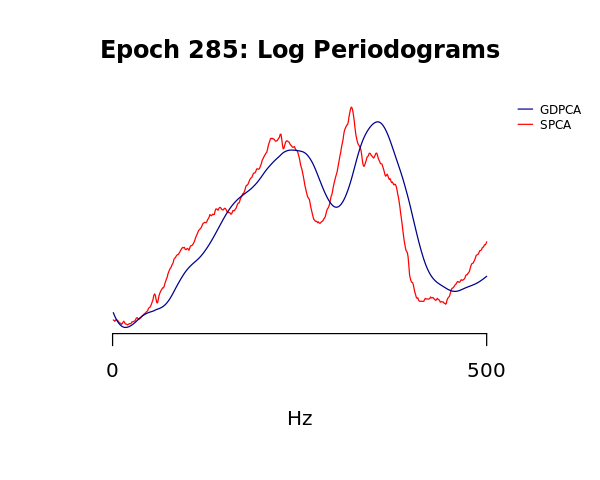

In [17]:
plot_periodograms(GDPC, SPCA, 285)

# Pre Epoch 296

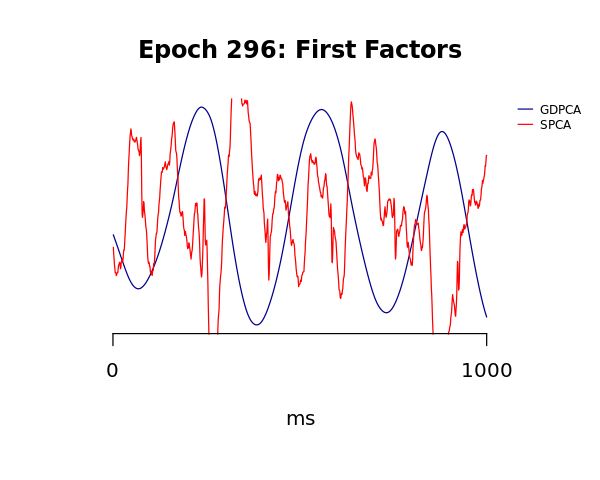

In [18]:
plot_factors(GDPC, SPCA, 296)

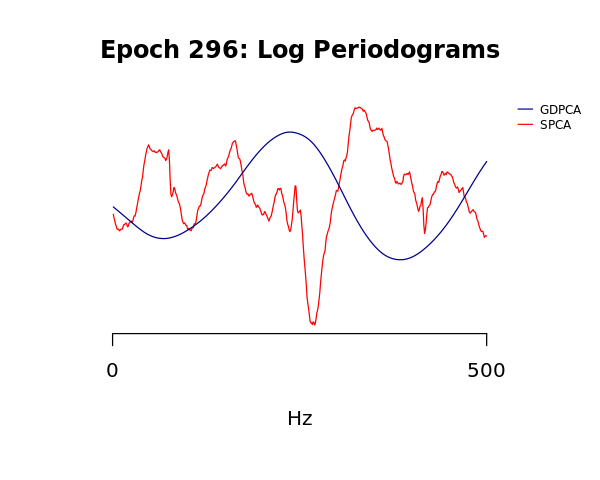

In [19]:
plot_periodograms(GDPC, SPCA, 296)

# Compare Pre LFP to Factors

In [20]:
# Read in pre_pmcao data
data = readMat('data/F141020-lfp-5min-1kHz.mat')
pre_pmcao = data$pre.pmcao

In [21]:
excludes = c(1:5, 7:8, 11:12, 14:16, 18:26, 28:32)
Z_pre = (pre_pmcao[, excludes] - mean(pre_pmcao[, excludes])) / sd(pre_pmcao[, excludes])

# LFP vs Factors

In [105]:
epochs = c(1, 45, 187, 212, 285, 296)
for(i in epochs){
    png(filename = sprintf("figures/pre_lfp_factors/pre_lfp_factors_epoch%i.png", i))
    plot_lfp_factor(Z_pre, GDPC, SPCA, i)
    #plot_factors(GDPC, SPCA, i)
    dev.off()
}

In [22]:
plot_lfp_factor <- function(lfp, gfactor, sfactor, epoch) {
    par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)
    params = list(yaxt="n", xaxt="n", ylab="", xlab="ms", 
              bty="n", main=sprintf("Epoch %s: LFPs 1-10 Channels", epoch), xpd=FALSE)
    ts.plot(lfp[((epoch-1)*1000+1):(epoch*1000),], gpars=params)
    lines(gfactor[,epoch], col='red', lwd=2)
    lines(sfactor[,epoch], col='orange', lwd=2)
    axis(side=1, at=seq(0, 1000, 1000))
    legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
           lty=c(1,1),col=c("red", "orange"), inset=c(-0.17, 0))
}

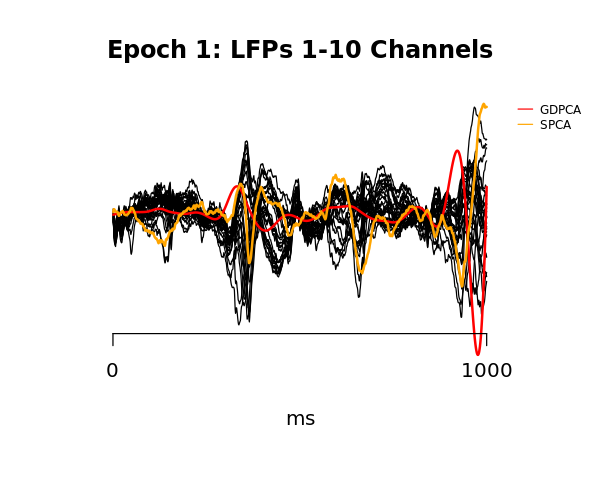

In [23]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 1)

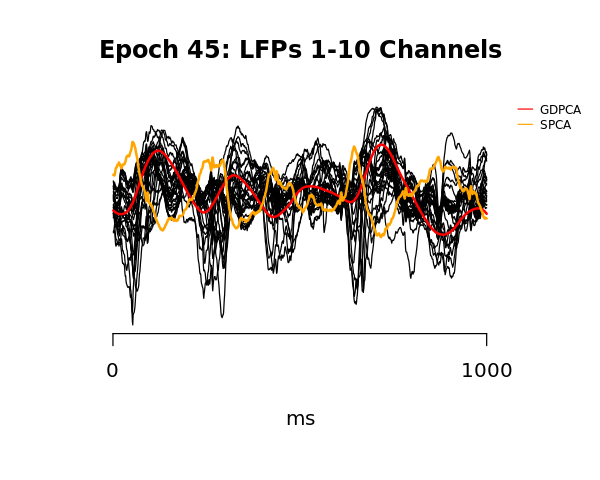

In [24]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 45)

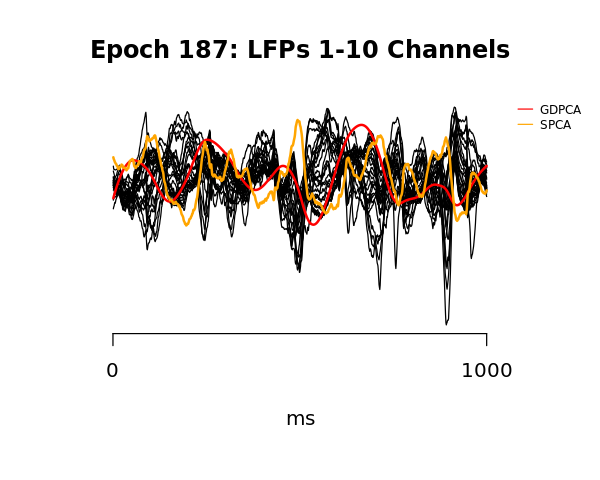

In [25]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 187)

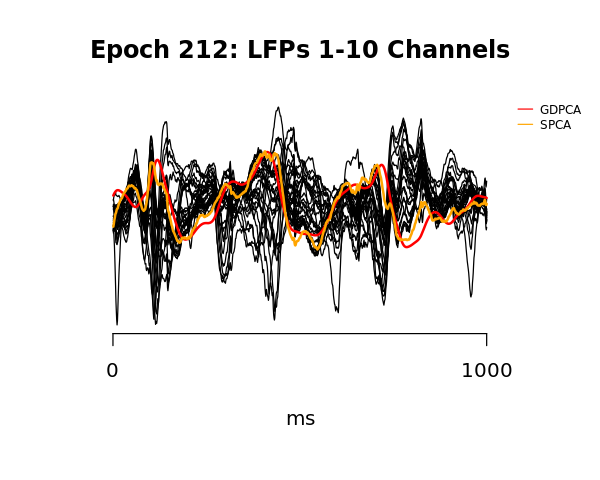

In [26]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 212)

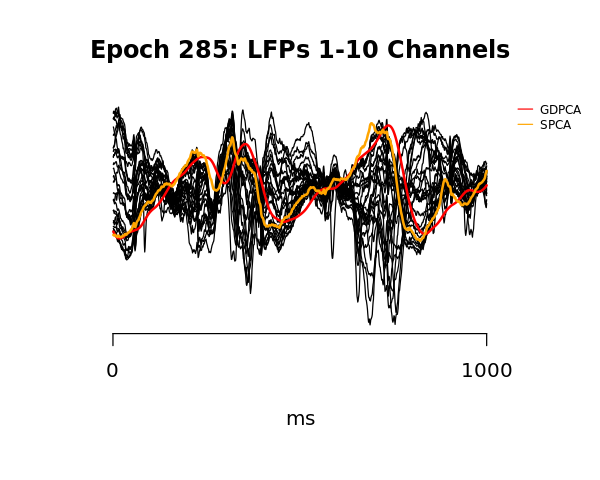

In [27]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 285)

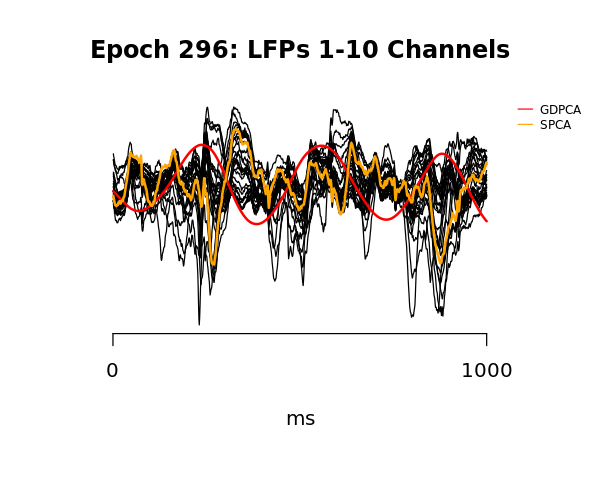

In [28]:
plot_lfp_factor(Z_pre, GDPC, SPCA, 296)

# Functional boxplots and medians

In [99]:
png(filename = "figures/pre_functional/gdpca_pre_functional.png")
gpca_fb = fbplot(Xgpd,method='MBD',ylab="",xlab="Hz", main = "GDPCA functional boxplot", 
                 ylim=c(-10, 13),  xaxt="n", yaxt="n", bty = "n")
axis(side=1, at=seq(0, 500, 500))
dev.off()

png 
  2

In [100]:
png(filename = "figures/pre_functional/spca_pre_functional.png")

spca_fb = fbplot(Xspd,method='MBD',ylab="",xlab="Hz", main = "SPCA functional boxplot",
                 ylim=c(-8, 11),  xaxt="n", yaxt="n", bty = "n")
axis(side=1, at=seq(0, 500, 500))
dev.off()

png 
  2

In [31]:
names(spca_fb)

[1] "depth"    "outpoint" "medcurve"

In [101]:
png(filename = "figures/pre_functional/pre_spca_gdpca_median.png")

#Extracting the median curve for SPCA periodograms
par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)

spca_med = spca_fb$medcurve
plot(Xgpd[,spca_med], xaxt="n", yaxt="n", bty = "n", col = "darkblue", xlab = "Hertz",
     lwd = 1.5, main = "Median curves", ylab = "", type = 'l')
axis(side=1, at=seq(0, 500, 500))
gpca_med = gpca_fb$medcurve
lines(Xspd[, gpca_med], col = "red")
legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
       lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.17, 0))
dev.off()

png 
  2

# Save plots for all factors in SPCA and GDPCA

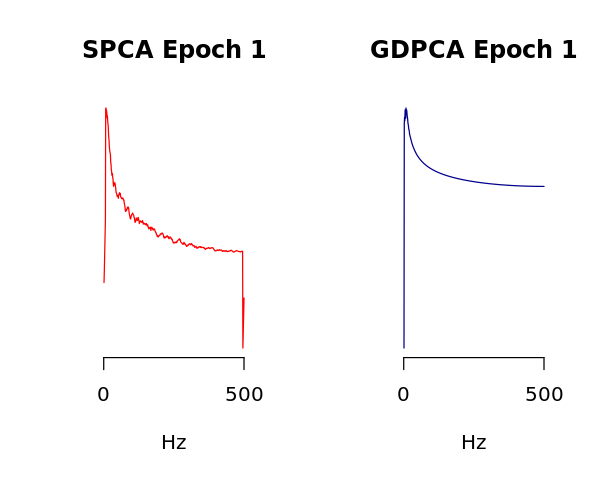

In [33]:
i = 1
par(mfrow = c(1, 2))
plot(Xspd[, i], xaxt="n", yaxt="n", type='l', ylab='',
     main=sprintf("SPCA Epoch %s", i),xlab='Hz', bty="n", col="red")
axis(side=1, at=seq(0, 500, 500))

plot(Xgpd[, i], xaxt="n", yaxt="n", type='l', ylab='',
     main=sprintf("GDPCA Epoch %s", i),xlab='Hz', bty="n", col="darkblue")
axis(side=1, at=seq(0, 500, 500))


In [34]:
collect_plots <- function(X1, X2, epoch, color, new=FALSE) {
    # Setup side-by-side
    par(mfrow = c(1, 2))
    plot(X1[, epoch], xaxt="n", yaxt="n", type='l', ylab='',
     main=sprintf("SPCA Epoch %s", epoch),xlab='Hz', bty="n", col=color)
    axis(side=1, at=seq(0, 500, 500))

    plot(X2[, epoch], xaxt="n", yaxt="n", type='l', ylab='',
     main=sprintf("GDPCA Epoch %s", epoch),xlab='Hz', bty="n", col=color)
    axis(side=1, at=seq(0, 500, 500))
}

In [35]:
# epoch = 1
# png(filename="figures/1.png")
# collect_plots(Xspd, Xgpd, epoch, color="red")
# dev.off()
# #collect_plots(Xspd, Xgpd, epoch, color="black", new=TRUE)

In [36]:
# for(i in 2:300) {
    
#     png(filename = sprintf("figures/%s.png", i))
#     par(mfrow = c(1, 2))
#     plot(Xspd[, i], xaxt="n", yaxt="n", type='l', ylab='',
#     main=sprintf("SPCA Epoch %s", i),xlab='Hz', bty="n", col="black")
#     axis(side=1, at=seq(0, 500, 500))
    
#     for(j in 1:i) {
#         lines(Xspd[, j], col = "black")
#     }
#     lines(Xspd[, i], col = "red", lwd = 2)
    
#     plot(Xgpd[, i], xaxt="n", yaxt="n", type='l', ylab='',
#     main=sprintf("GDPCA Epoch %s", i),xlab='Hz', bty="n", col="black")
#     axis(side=1, at=seq(0, 500, 500))
    
#     for(j in 1:i) {
#         lines(Xgpd[, j], col = "black")
#     }
#     lines(Xgpd[, i], col = "red", lwd = 2)
#     dev.off()
    
# }

# Post factors

In [37]:
# Read post_pmcao factors for GDPCA
GDPC_post <- as.matrix(read.table("data/gdpca_post_factors.rmat", as.is = TRUE))
colnames(GDPC_post) <- NULL
GDPC_post <- unname(GDPC_post)

# Read pre_pmcao factors for SPCA
SPCA_post = as.matrix(read.csv("data/factor1_post_normalized_removed.csv"))[, 2:1001]

# Take transpose of SPCA for functional boxplots
SPCA_post = t(SPCA_post)

sprintf("Dims of GDPC: %s\n", dim(GDPC_post))
sprintf("Dims of SPCA_post: %s\n", dim(SPCA_post))

[1] "Dims of GDPC: 1000\n" "Dims of GDPC: 300\n"

[1] "Dims of SPCA_post: 1000\n" "Dims of SPCA_post: 300\n"

In [38]:
# Change plot size to 5 x 4
options(repr.plot.width=5, repr.plot.height=4)

In [106]:
# plot_factors <- function(GDPC, SPCA, epoch) {
#     par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)
#     plot(GDPC[, epoch], xaxt="n", yaxt="n", type='l', ylab='',
#          main=sprintf("Epoch %s: First Factors", epoch),xlab='ms', bty="n", col="darkblue")
#     lines(SPCA[, epoch], col=2, xpd=FALSE)
#     axis(side=1, at=seq(0, 1000, 1000))
#     legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
#            lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.17, 0))
# }

# plot_periodograms <-function(Xgpd, Xspd, epoch) {
#     par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)
#     plot(Xspd[, epoch], xaxt="n", yaxt="n", type='l', ylab='', xlab='Hz',
#          main=sprintf("Epoch %s: Log Periodograms", epoch), bty='n', col='red')
#     lines(Xgpd[, epoch], col="darkblue", xpd=FALSE)
#     axis(side=1, at=seq(0, 500, 500))
#     legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
#            lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.17, 0))
# }

In [40]:
# Get log periodograms for SPCA and GDPC
Xs_post = log_periodograms(SPCA_post, num_epochs=300)
Xg_post = log_periodograms(GDPC_post, num_epochs=300, smooth=FALSE)

In [41]:
#dim(Xg_post)

# Post Epoch 1

In [117]:
epochs = c(1, 45, 187, 212, 285, 296)
for(i in epochs){
    png(filename = sprintf("figures/post_factors_log/post_factor_epoch%s.png", i))
    plot_factors(GDPC_post, SPCA_post, i)
    dev.off()
    
    png(filename = sprintf("figures/post_factors_log/post_log_epoch%s.png", i))
    plot_periodograms(Xg_post, Xs_post, i)
    dev.off()
}

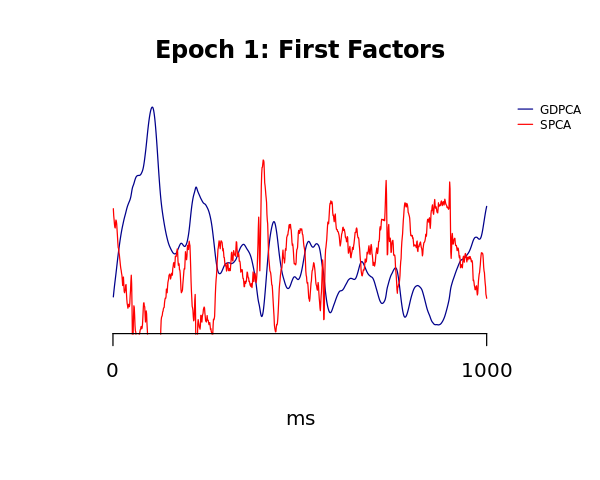

In [42]:
plot_factors(GDPC_post, SPCA_post, 1)

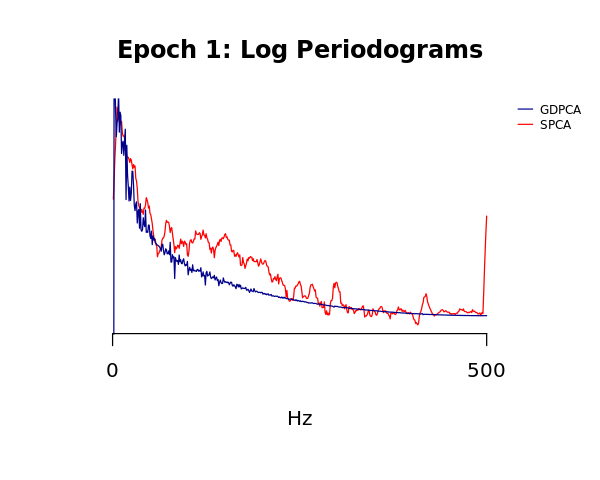

In [43]:
plot_periodograms(Xg_post, Xs_post, 1)

# Post Epoch 45

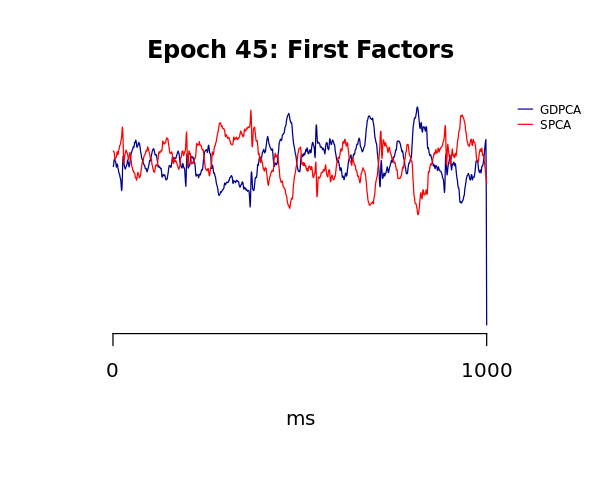

In [44]:
plot_factors(GDPC_post, SPCA_post, 45)

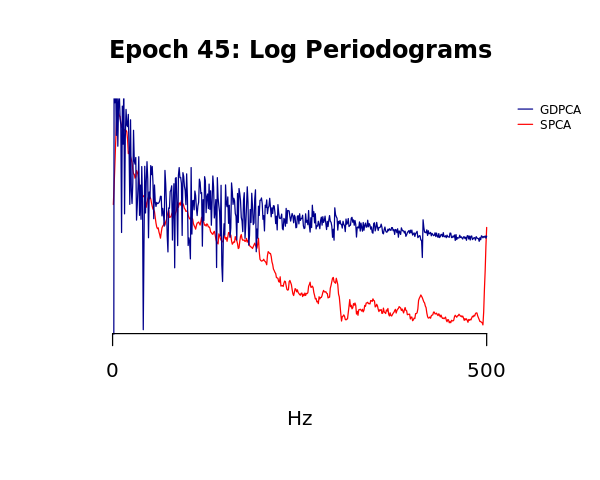

In [45]:
plot_periodograms(Xg_post, Xs_post, 45)

# Post Epoch 187

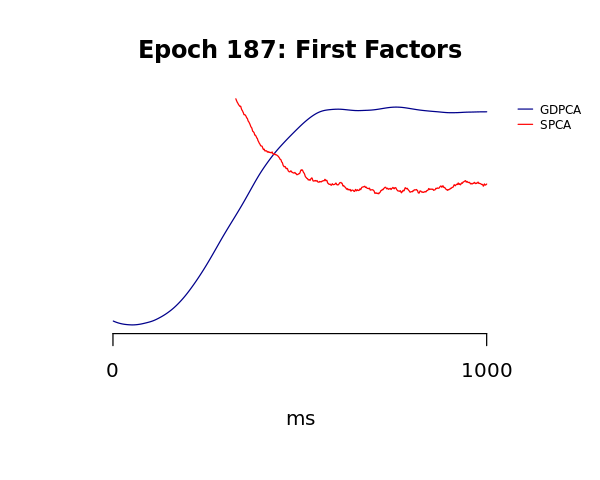

In [46]:
plot_factors(GDPC_post, SPCA_post, 187)

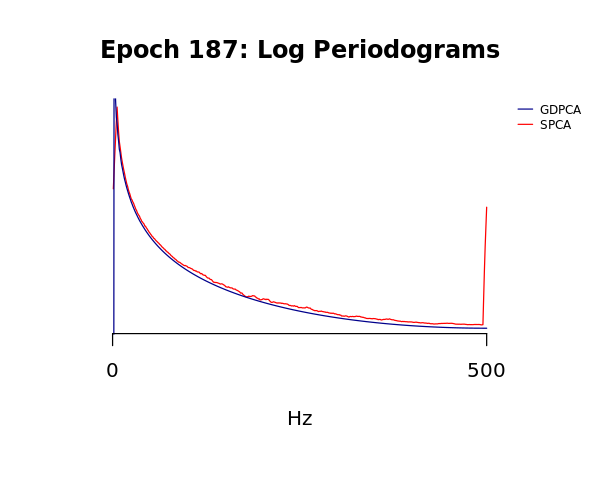

In [112]:
plot_periodograms(Xg_post, Xs_post, 187)

# Post Epoch 212

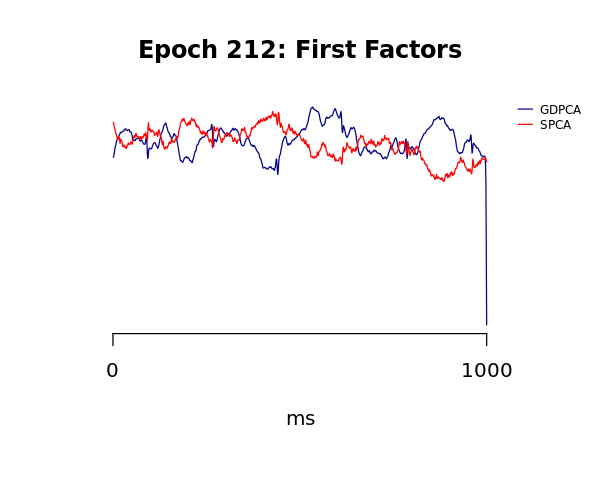

In [48]:
plot_factors(GDPC_post, SPCA_post, 212)

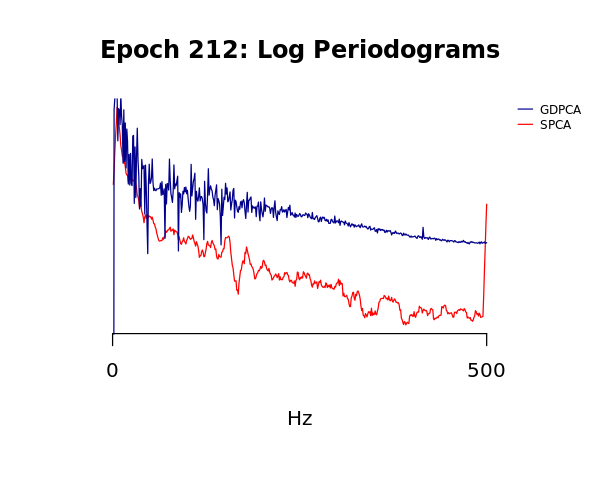

In [49]:
plot_periodograms(Xg_post, Xs_post, 212)

# Post Epoch 285

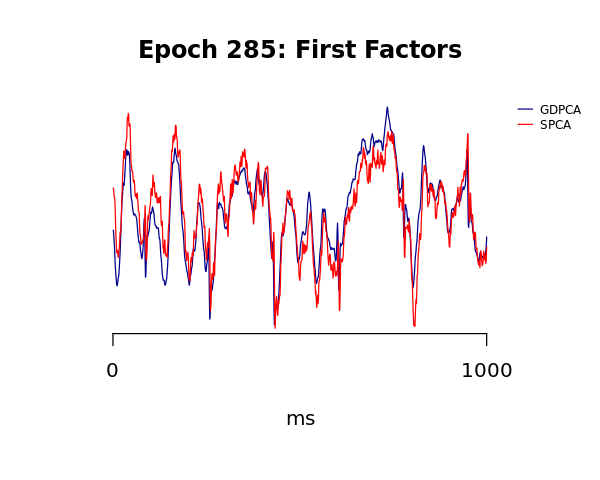

In [50]:
plot_factors(GDPC_post, SPCA_post, 285)

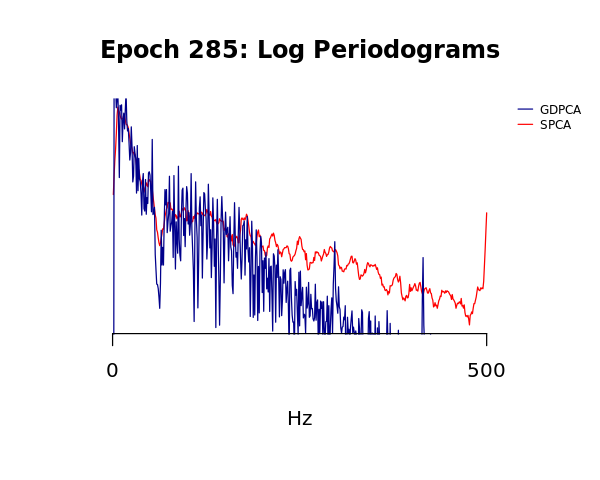

In [51]:
plot_periodograms(Xg_post, Xs_post, 285)

# Post Epoch 296

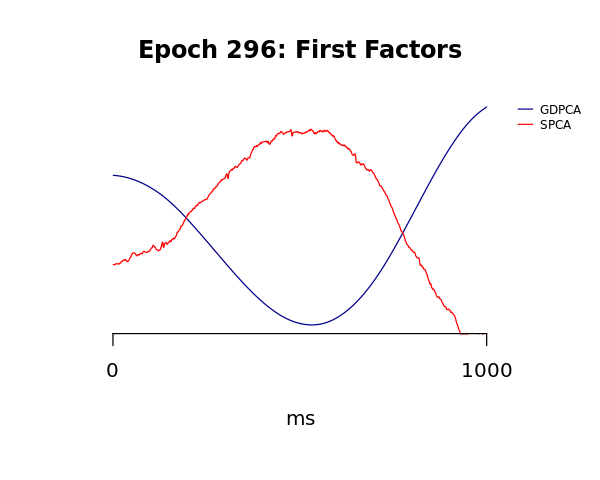

In [52]:
plot_factors(GDPC_post, SPCA_post, 296)

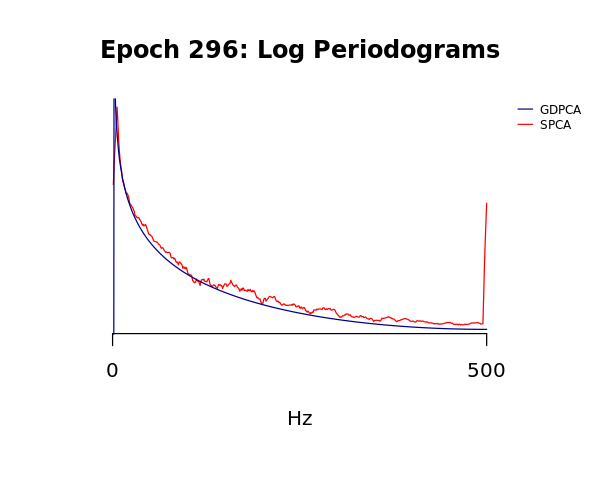

In [53]:
plot_periodograms(Xg_post, Xs_post, 296)

In [57]:
# Read in post_pmcao data
post_pmcao = data$post.pmcao

In [82]:
excludes = c(1:5, 7:8, 11:12, 14:16, 18:26, 28:32)
Z_post = (post_pmcao - mean(post_pmcao)) / sd(post_pmcao)
Z_post = Z_post[, excludes]

In [86]:
gp = (GDPC_post[,1] - mean(GDPC_post[,1])) / sd(post_pmcao[,excludes])

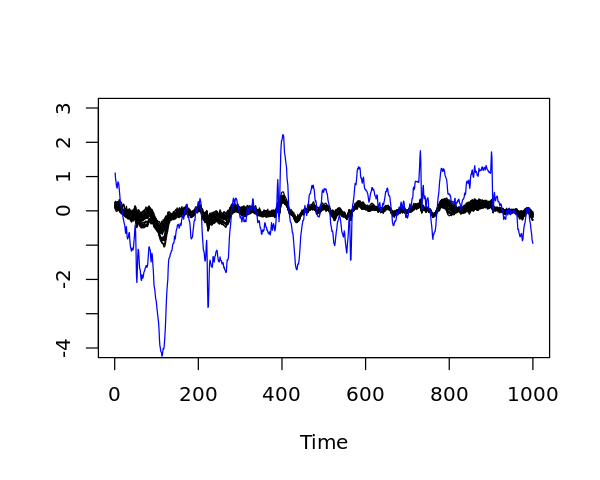

In [90]:
ts.plot(Z_post[1:1000,], ylim=c(-4,3))
lines(SPCA_post[,1], col=4)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 1)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 45)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 187)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 212)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 285)

In [ ]:
#plot_lfp_factor(Z_post, GDPC_post, SPCA_post, 296)

In [ ]:
#var(SPCA_post[,296])

# Post Functional boxplots and medians

In [102]:
png(filename = "figures/post_functional/gdpca_post_functional.png")

gpca_post_fb = fbplot(Xg_post,method='MBD',ylab="",xlab="Hz", main = "GDPCA functional boxplot", 
                 ylim=c(-10, 13),  xaxt="n", yaxt="n", bty = "n")
axis(side=1, at=seq(0, 500, 500))
dev.off()

png 
  2

In [103]:
png(filename = "figures/post_functional/spca_post_functional.png")

spca_post_fb = fbplot(Xs_post,method='MBD',ylab="",xlab="Hz", main = "SPCA functional boxplot",
                 ylim=c(-8, 11),  xaxt="n", yaxt="n", bty = "n")
axis(side=1, at=seq(0, 500, 500))
dev.off()

png 
  2

In [104]:
png(filename = "figures/post_functional/post_spca_gdpca_median.png")

#Extracting the median curve for SPCA periodograms
par(mar=c(6.1, 4.1, 4.1, 4.1), xpd=TRUE)

spca_post_med = spca_post_fb$medcurve
plot(Xs_post[,spca_post_med], xaxt="n", yaxt="n", bty = "n", col = "red", xlab = "Hz",
     lwd = 1.5, main = "Median curves", ylab = "", type = 'l')
axis(side=1, at=seq(0, 500, 500))

gpca_post_med = gpca_post_fb$medcurve
lines(Xg_post[, gpca_post_med], col = "darkblue")
legend("topright", ex.cs1, cex=0.6, y.intersp=2.5,legend=c("GDPCA", "SPCA"), bty="n", 
       lty=c(1,1),col=c("darkblue", "red"), inset=c(-0.17, 0))
dev.off()

png 
  2